In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import silhouette_score
from preprocessing import preprocess,get_labels
#Clustering Functions
from isaac.clustering import hierarchical

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [21]:
sns.set_theme(
    context = 'notebook',
    style = 'whitegrid'
)

In [3]:
# Change to dataset path
df = pd.read_csv("data/plant_health_data.csv")
df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


# Preprocess Data
Before we analyze our data we perform pre-processing including dropping unnecessary columns and standardizing our dataset. We also apply pca to our dataset so we can visualize the outputs of our clustering algorithmns  

In [6]:
X = preprocess(df, attr = [])
y = get_labels(df)
X.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Timestamp,,,,,,,,,,,
2024-10-03 10:54:53.407995,0.278321,-0.511285,0.662825,0.049963,-0.247408,-1.620166,-1.746638,1.355983,0.768579,0.108796,-0.080646
2024-10-03 16:54:53.407995,-1.184139,-0.666361,-0.435676,1.035845,-0.072300,1.051744,0.052635,-0.424888,-1.043216,-0.770972,-1.431377
2024-10-03 22:54:53.407995,-0.924655,-0.819209,-1.557519,1.478694,-0.094261,-1.491368,-0.066879,-0.234739,0.479665,1.015220,0.163452
2024-10-04 04:54:53.407995,-1.126428,-0.408656,0.962382,0.380088,-1.626583,-1.615750,-1.141667,-0.356286,-0.330470,0.352435,0.344986
2024-10-04 10:54:53.407995,1.696462,1.433049,-0.633556,1.015672,-0.736748,-1.039349,-1.664853,0.666060,0.646682,1.542359,1.082045


In [10]:
pca = PCA(n_components = 2)
in_2d = pca.fit_transform(X) 
in_2d = pd.DataFrame(data = in_2d, index = X.index, columns = ['PC1', 'PC2'])

,PC1,PC2
Timestamp,,
2024-10-03 10:54:53.407995,1.058558,0.828275
2024-10-03 16:54:53.407995,-1.014232,-0.612193
2024-10-03 22:54:53.407995,0.147114,0.731384
2024-10-04 04:54:53.407995,1.203460,-0.323942
2024-10-04 10:54:53.407995,2.474336,2.295400


# Clustering
We implemented 3 clustering algorithmns:
* Hierarchical Clustering
* ALEX
* AKI
  
We go more in depth about our choices of hyper-parameters and methods in our own notebooks in the ```src/<name>``` directories. We analyze the quality of our clustering algorithmns and the cluster structure of our dataset using the *Silhouette Score*  

## Hierarchical Clustering (HC)

In [45]:
h_clusts = hierarchical(X,n_clusters=6)
in_2d['hierarchical'] = h_clusts

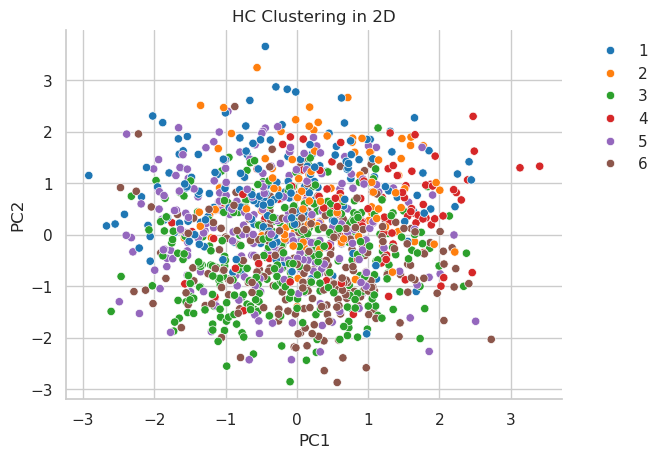

In [46]:
sns.scatterplot(in_2d, x = 'PC1', y = 'PC2', hue = 'hierarchical',palette = 'tab10')
sns.despine()
plt.legend(bbox_to_anchor = (1.2,1), frameon = False)
plt.title("HC Clustering in 2D")
plt.show()

All clusters overlap, and are not informative.  For this 2D perspective it's difficult to see any clustering behaviour.

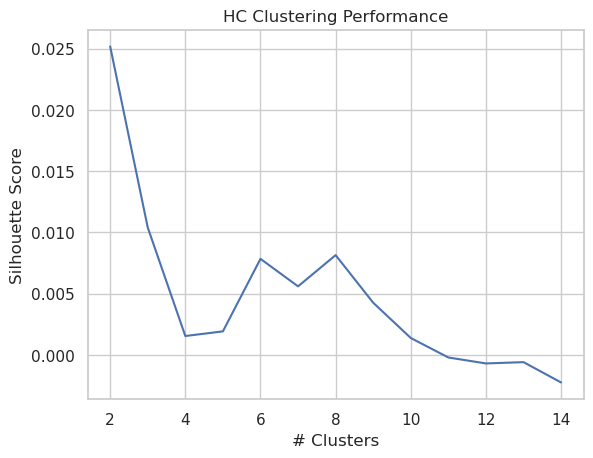

In [44]:
h_scores = []
for i in range(2,15):
    h_scores.append(silhouette_score(X, hierarchical(X,n_clusters=i)))
plt.plot(list(range(2,15)), h_scores)
plt.title("HC Clustering Performance")
plt.xlabel("# Clusters")
plt.ylabel("Silhouette Score")
plt.show()

By sweeping the number of clusters we can analyze whether we simply chose a bad initialization for the number of clusters.  This isn't the case, all possible clustering have a low silhouette score on this dataset indicating a lack of clustering structure.

# Next Clustering Method...